In [21]:
import pandas as pd
data=pd.read_excel('./data/total_data2.xlsx')

In [22]:
data.head()

,USER_ID,date,call_duration,db_value_mean,db_value_max,db_value_min,heart_rate_mean,heart_rate_max,heart_rate_min,lux_value_mean,...,pic_num,sleep_duration,step_count,app_acc,app_audio,app_game,app_img,app_maps,app_news,app_video
0,admin,20230622,83,56.0,61,51,69.5,71,68,551.0,...,1,420,13595,7,3,9,4,5,11,2
1,admin,20230623,1197,76.5,97,56,73.5,86,61,465.0,...,2,350,14777,10,4,9,3,2,2,9
2,admin,20230624,100,73.5,90,57,64.5,74,55,481.0,...,22,310,3945,3,3,1,7,11,9,12
3,admin,20230625,180,63.0,81,45,75.5,92,59,698.5,...,1,190,6717,11,0,3,0,4,12,9
4,admin,20230626,46,60.0,79,41,67.5,76,59,192.0,...,16,400,10306,0,0,9,1,2,7,12


#### 카테고리형 데이터 : Label Encoding
#### 수치형 데이터 : Standard Scaling

In [23]:
# data['year']=data['date'].apply(lambda x:str(x)[:4])
# data['month']=data['date'].apply(lambda x:str(x)[4:6])
# data['day']=data['date'].apply(lambda x:str(x)[6:8])

# data.drop(['date'],axis=1,inplace=True)

In [24]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 객체로 생성
encoder = LabelEncoder()

# fit, transform 메소드를 통한 레이블 인코딩
encoder.fit(data['USER_ID'])
data["USER_ID"] = encoder.transform(data['USER_ID'])
data.head()

,USER_ID,date,call_duration,db_value_mean,db_value_max,db_value_min,heart_rate_mean,heart_rate_max,heart_rate_min,lux_value_mean,...,pic_num,sleep_duration,step_count,app_acc,app_audio,app_game,app_img,app_maps,app_news,app_video
0,0,20230622,83,56.0,61,51,69.5,71,68,551.0,...,1,420,13595,7,3,9,4,5,11,2
1,0,20230623,1197,76.5,97,56,73.5,86,61,465.0,...,2,350,14777,10,4,9,3,2,2,9
2,0,20230624,100,73.5,90,57,64.5,74,55,481.0,...,22,310,3945,3,3,1,7,11,9,12
3,0,20230625,180,63.0,81,45,75.5,92,59,698.5,...,1,190,6717,11,0,3,0,4,12,9
4,0,20230626,46,60.0,79,41,67.5,76,59,192.0,...,16,400,10306,0,0,9,1,2,7,12


In [25]:
# cat_cols=['USER_ID','year', 'month', 'day']
cat_cols=['USER_ID']
num_cols=['call_duration', 'db_value_mean', 'db_value_max',
       'db_value_min', 'heart_rate_mean', 'heart_rate_max', 'heart_rate_min',
       'lux_value_mean', 'lux_value_max', 'lux_value_min', 'msg_num',
       'pic_num', 'step_count', 'app_acc', 'app_audio',
       'app_game', 'app_img', 'app_maps', 'app_news', 'app_video']

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

X=data.drop(['sleep_duration'],axis=1)
Y=data['sleep_duration']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 531)
Names = X.columns
print(X_train)
print("_____________________________")
X_train=X_train.reset_index()
print(X_train)
X_test=X_test.reset_index()

    USER_ID      date  call_duration  db_value_mean  db_value_max  \
46        0  20230611             99      59.500000            72   
0         0  20230622             83      56.000000            61   
48        0  20230613            189      58.500000            74   
40        4  20230624             12      72.500000            94   
30        1  20230708             45      61.000000            67   
22        2  20230629            447      66.000000            77   
57        3  20230630            754      57.500000            68   
4         0  20230626             46      60.000000            79   
13        0  20230706            130      73.500000            93   
17        0  20230710            992      67.000000            90   
39        4  20230623              0      58.000000            71   
34        1  20230628           1063      69.500000            81   
5         0  20230627            206      70.142857            90   
56        3  20230629            1

In [7]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train[num_cols])
X_train_scaled = std.transform(X_train[num_cols])
X_test_scaled = std.transform(X_test[num_cols])

X_train=pd.concat([X_train[cat_cols],pd.DataFrame(X_train_scaled, columns=num_cols)],axis=1)
X_test=pd.concat([X_test[cat_cols],pd.DataFrame(X_test_scaled, columns=num_cols)],axis=1)

#### 모델링

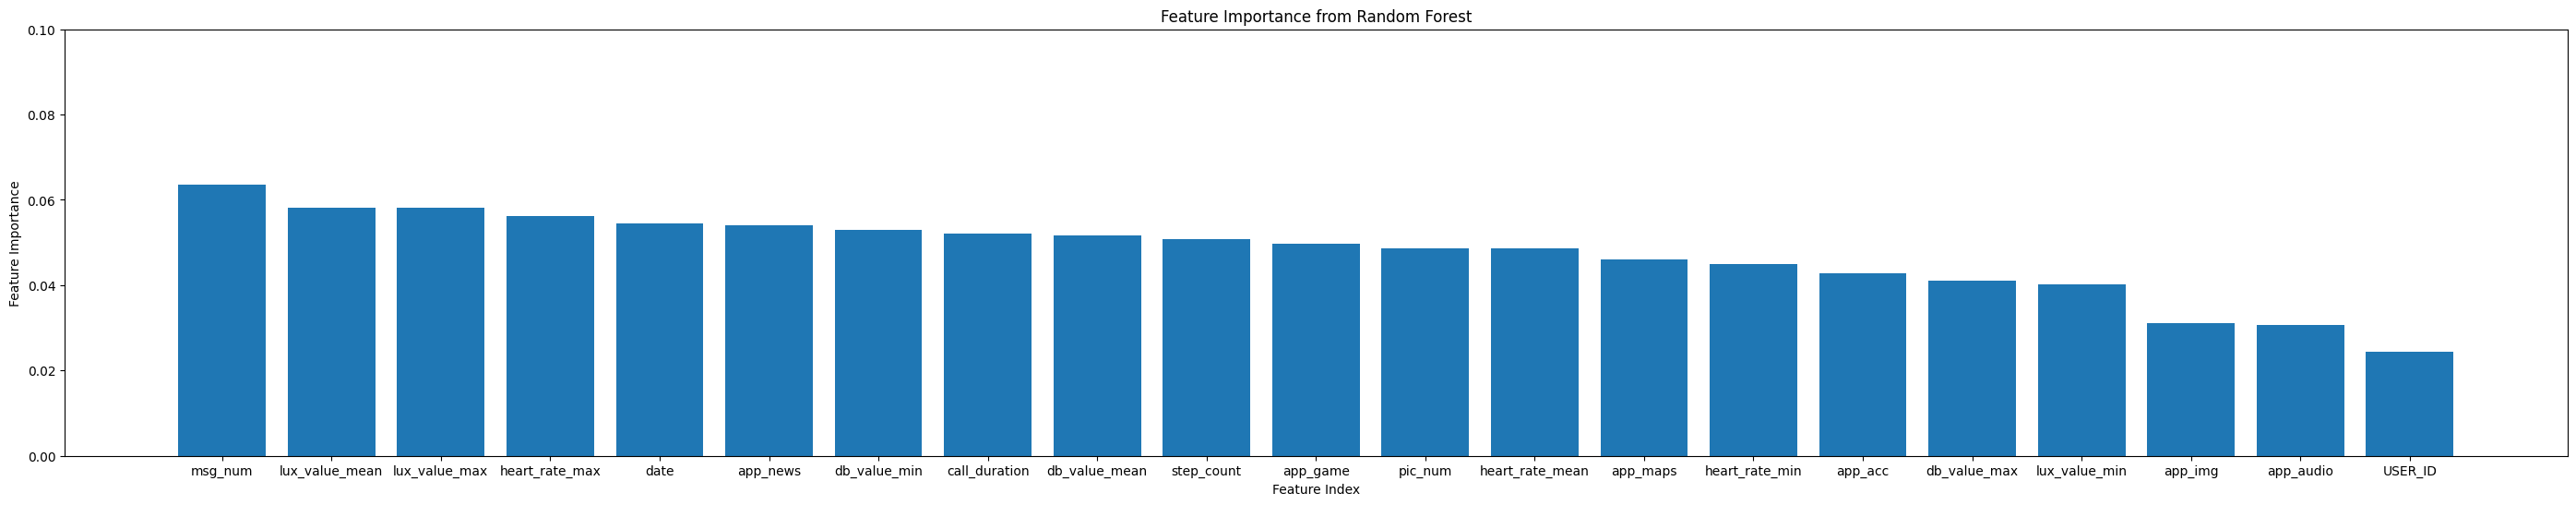

In [8]:
######### 변수 중요도 #########

model = RandomForestClassifier()
model.fit(X_train, y_train)
feature_importance = model.feature_importances_

import matplotlib.pyplot as plt

# 특성 중요도를 내림차순으로 정렬한 인덱스 배열
sorted_idx = feature_importance.argsort()[::-1]

# 시각화
plt.figure(figsize=(35, 6))
plt.bar(range(X_train.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), Names[sorted_idx])
plt.ylim([0, 0.1])
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance from Random Forest")
plt.show()

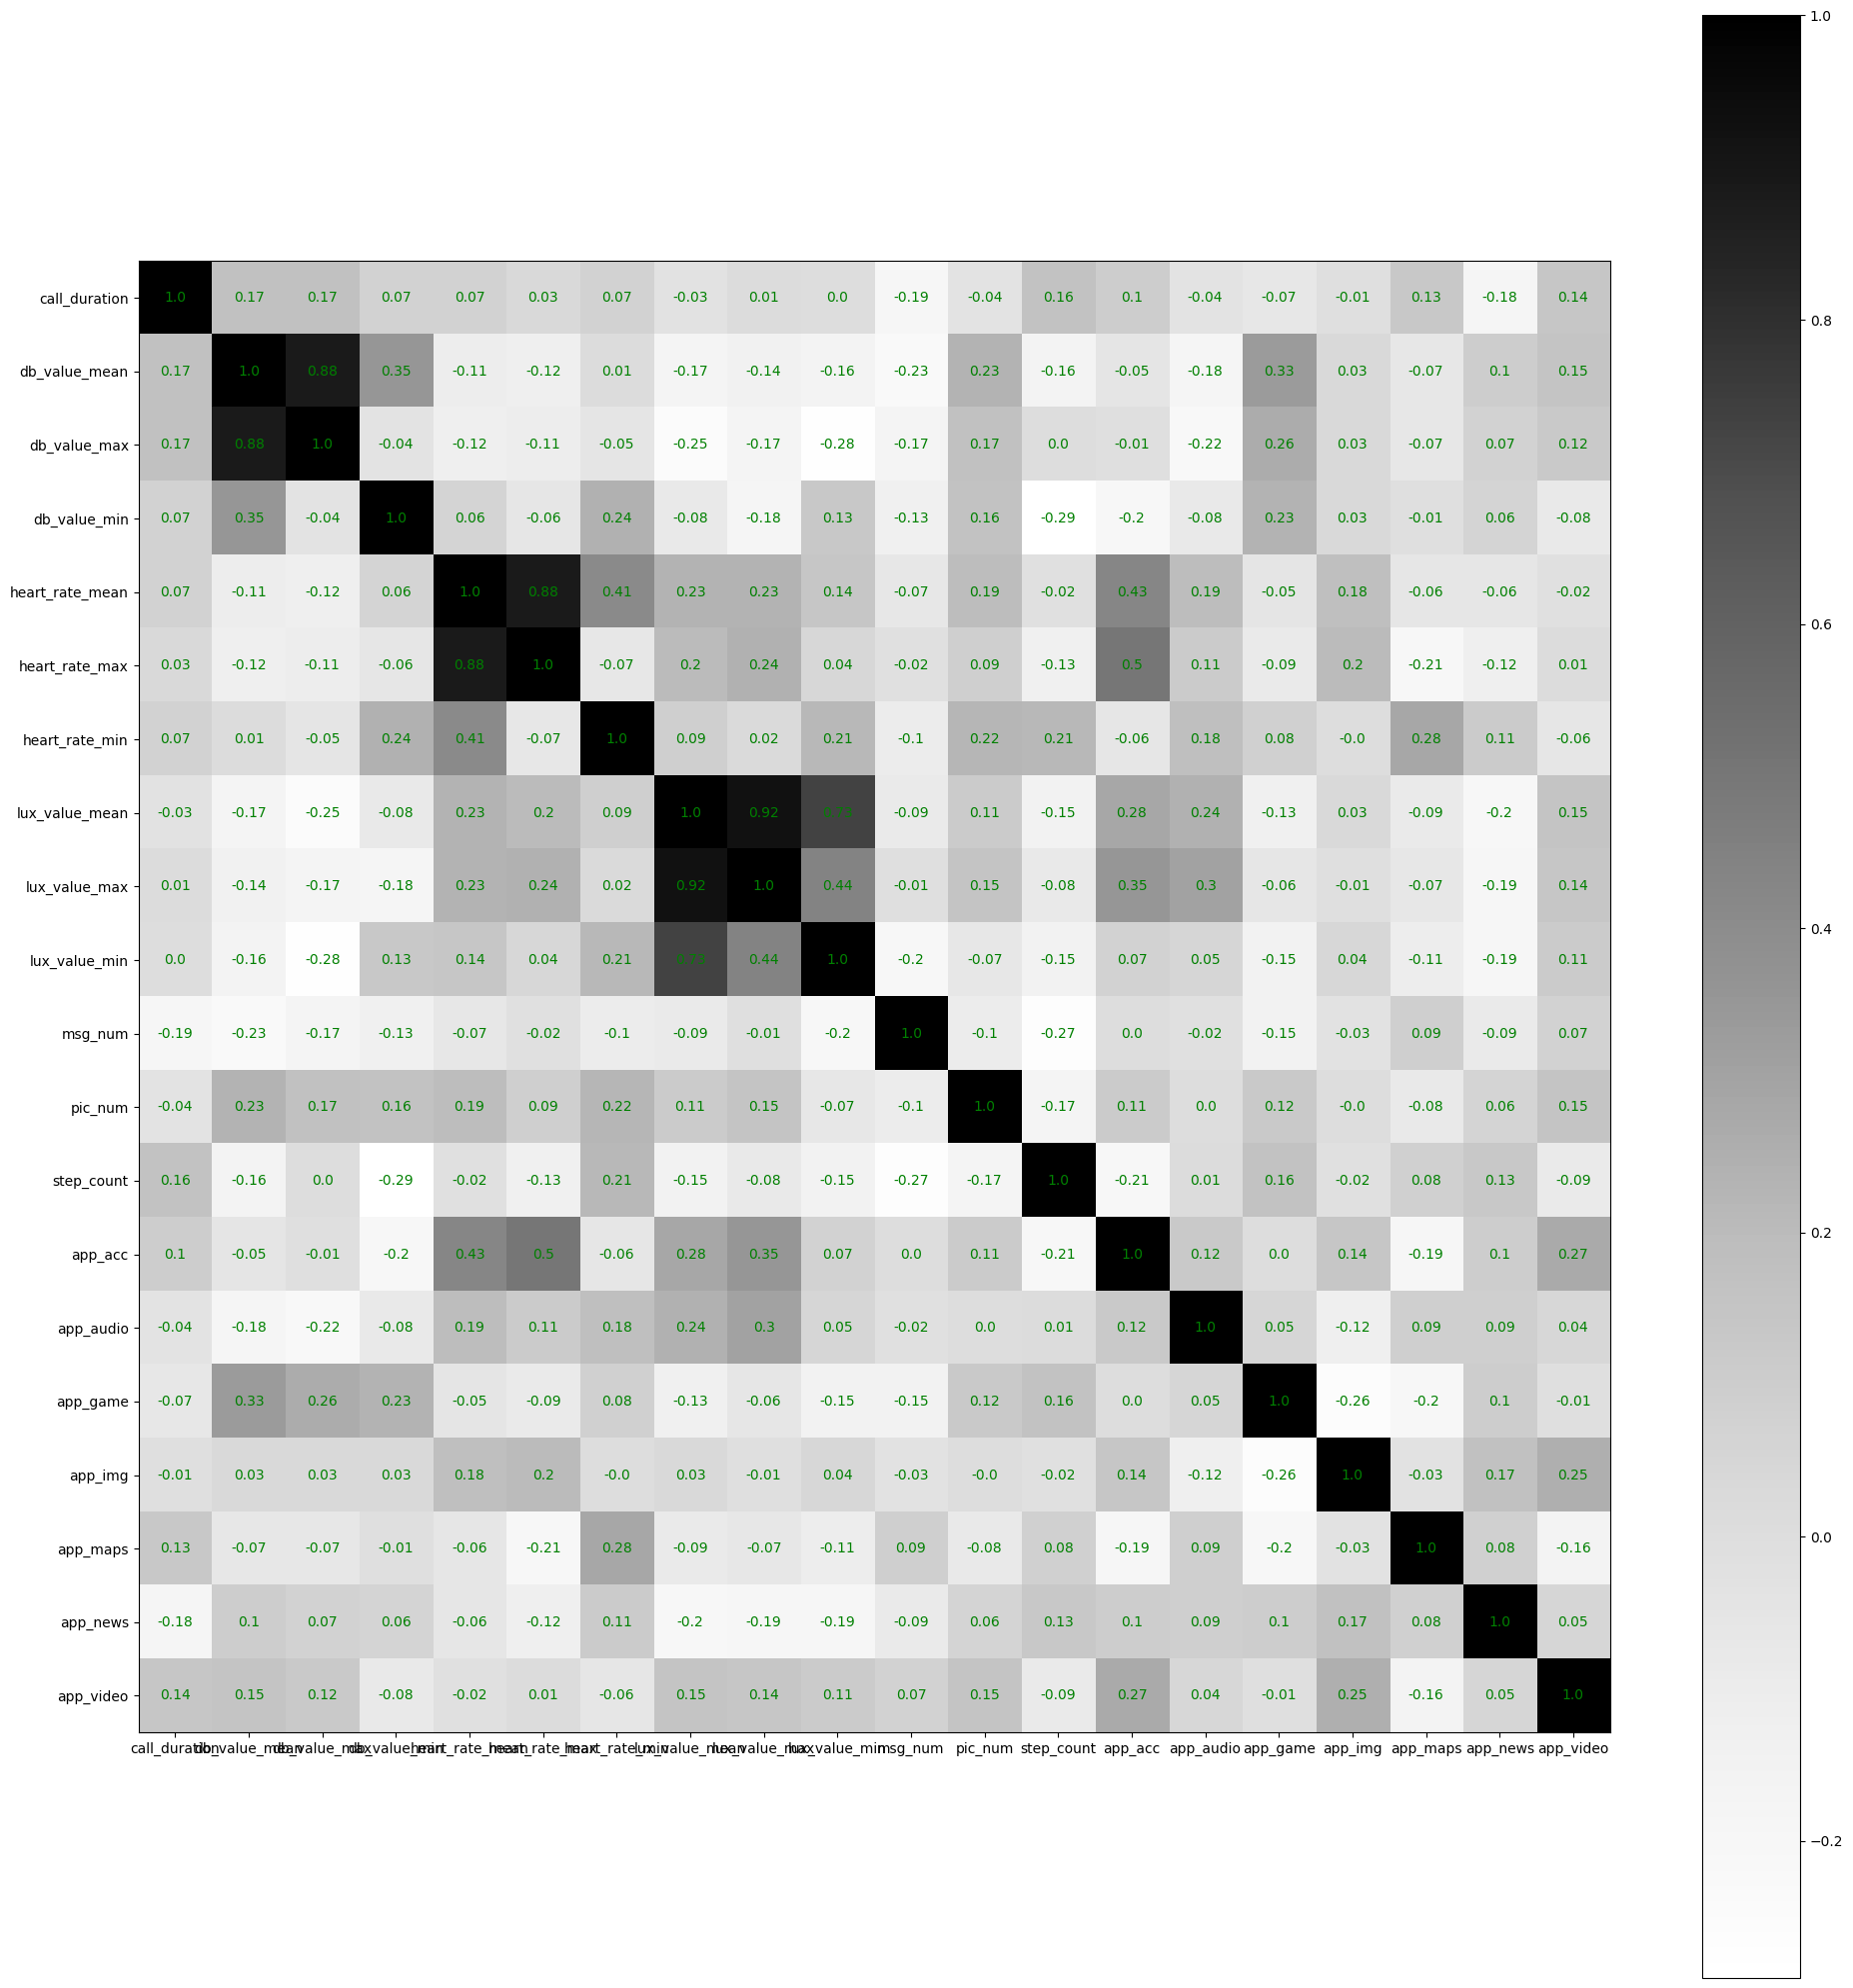

In [12]:
######### 상관관계 시각화 #########


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

corr_df = data[num_cols].corr().round(2)
fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(corr_df, cmap='Greys')

# Color Bar
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(corr_df.columns)))
ax.set_yticks(np.arange(len(corr_df.index)))

ax.set_xticklabels(corr_df.columns)
ax.set_yticklabels(corr_df.columns)

for x in range(len(corr_df.columns)):
    for y in range(len(corr_df.index)):
        ax.text(y, x, corr_df.iloc[y, x], ha='center', va='center', color='g')

fig.tight_layout()
plt.show()

In [10]:
!pip install shap

In [11]:
import xgboost
import shap

# XGBoost model 학습=
model = xgboost.XGBRegressor().fit(X_train, y_train)
from math import sqrt
from sklearn.metrics import mean_squared_error

model_predict = model.predict(X_test) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(model_predict, y_test)))) # RMSE

RMSE: 111.83794353147616


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [12]:
import shap
explainer = shap.TreeExplainer(model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(X_test) # Shap Values 계산

In [14]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:])

In [15]:
# 전체 검증 데이터 셋에 대해서 적용
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


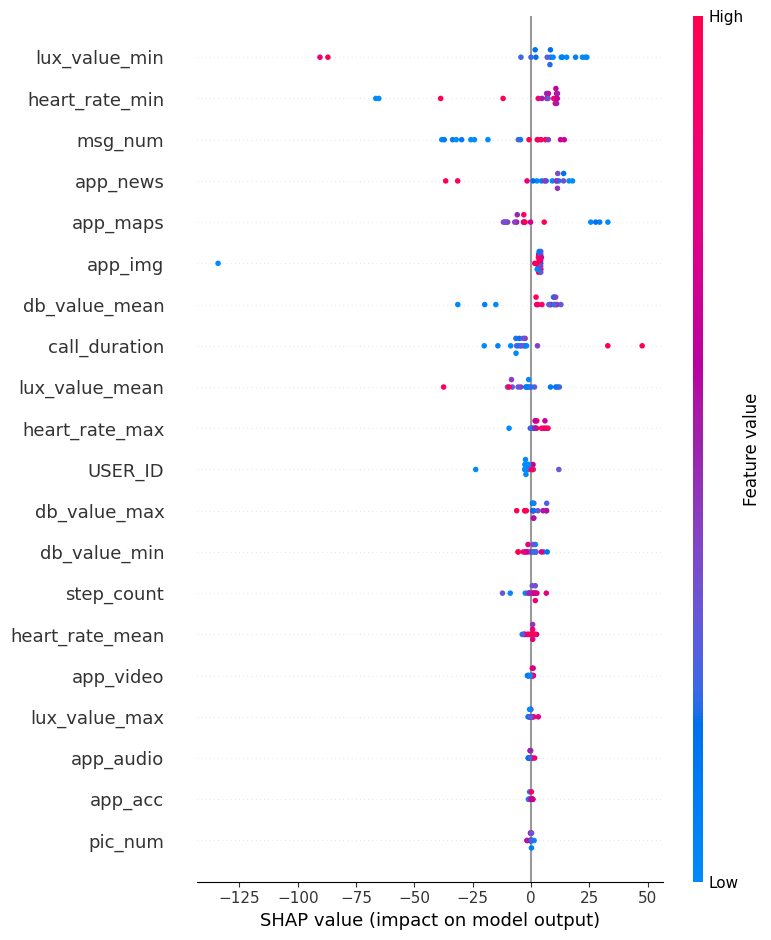

In [18]:
# summary
shap.summary_plot(shap_values, X_test)

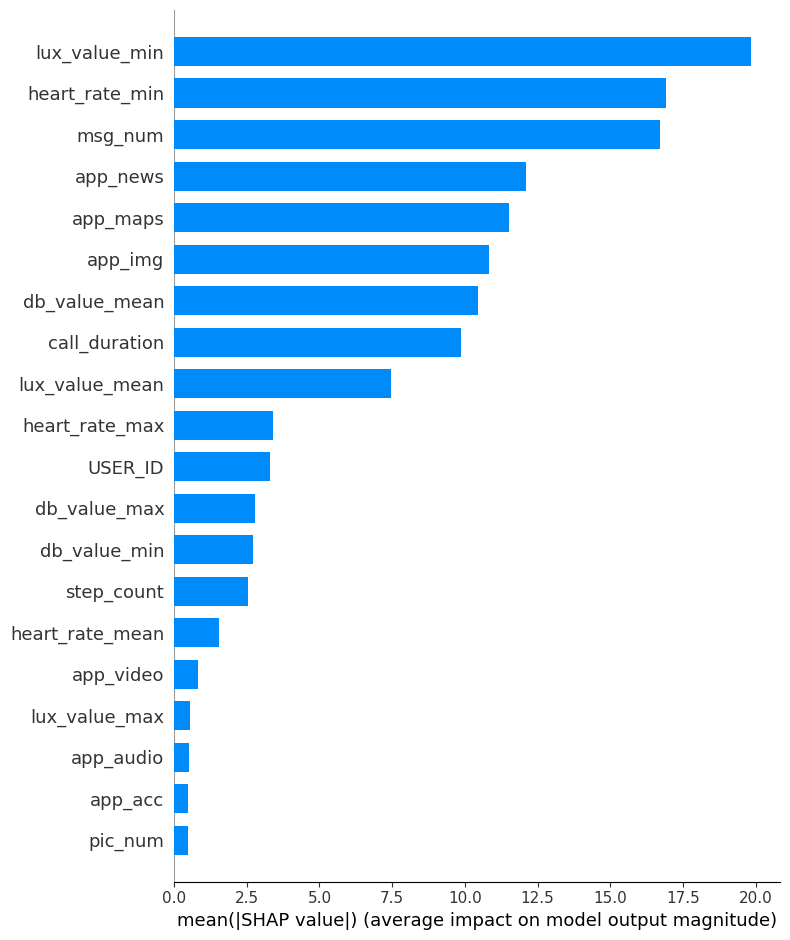

In [19]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, X_test, plot_type = "bar")

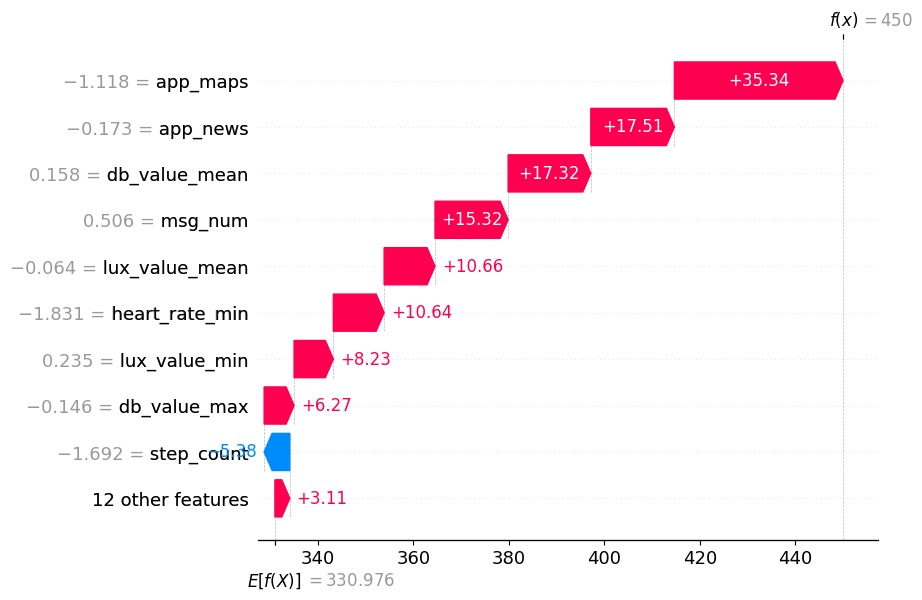

In [20]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[0])

#### 하이퍼 파라미터 튜닝

In [21]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
xgb = xgboost.XGBRegressor()
xgb_param_grid={
    'n_estimators' : [100,200,300,400,500, 600], #default=100
    'learning_rate' : [0.01,0.05,0.1], #default=0.1
    'max_depth' : [2, 3, 4, 5] #default=6, 일반적으로 3-10
    }

#추가적인 파라미터
'''
subsample[default=1] : 각 트리마다 데이터 샘플링 비율 over-fitting방지
일반적으로 0.5 ~ 1을 사용
colsample_bytree[default=1] : 각 트리마다 feature 샘플링 비율
일반적으로 0.5 ~ 1을 사용
min_child_weight[default=1] : child 에서 필요한 모든 관측치에 대한 가중치의 최소합
'''
xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring='neg_root_mean_squared_error', cv=5)
xgb_grid.fit(X_train, y_train)

model = xgb_grid.best_estimator_
pred = model.predict(X_test)

In [ ]:
print("RMSE: {}".format(sqrt(mean_squared_error(pred, y_test)))) # RMSE

RMSE: 108.4058687066455


In [ ]:
xgb_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)